In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

**Field Description**


**C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS**


**C/A**      = Control Area (A002)

**UNIT**     = Remote Unit for a station (R051)

**SCP**      = Subunit Channel Position represents an specific address for a device (02-00-00)

**STATION**  = Represents the station name the device is located at

**LINENAME** = Represents all train lines that can be boarded at this station
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
           
**DIVISION** = Represents the Line originally the station belonged to BMT, IRT, or IND  

**DATE**     = Represents the date (MM-DD-YY)

**TIME**     = Represents the time (hh:mm:ss) for a scheduled audit event
 
**ENTRIES** = The comulative entry register value for a device

**EXIST**    = The cumulative exit register value for a device

In [ ]:
def read_mta(file_nums):
    path ='http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    allFiles = []
    for i in file_nums:
        allFiles.append(path + i + ".txt")
    df_list = [pd.read_csv(file) for file in allFiles]
    df = pd.concat(df_list)
    df.columns = df.columns.str.strip()
    return df

In [ ]:
#Last 6 months
df = read_mta(['211113','211106', '211030', '211023', '211016','211009','211002','210925', '210918','210911', '210904','210828','210821','210814','210807','210731','210724','210717','210710','210703','210626','210619','210612', '210605','210529'])

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [ ]:
df_copy.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/06/2021,00:00:00,REGULAR,7660549,2627986
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/06/2021,04:00:00,REGULAR,7660560,2627991
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/06/2021,08:00:00,REGULAR,7660565,2628002
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/06/2021,12:00:00,REGULAR,7660608,2628090
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/06/2021,16:00:00,REGULAR,7660671,2628151


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242282 entries, 0 to 208911
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 479.9+ MB


In [ ]:
df_copy.shape

(5242282, 11)

In [ ]:
df_copy.describe()

,ENTRIES,EXITS
count,5.242282e+06,5.242282e+06
mean,4.167116e+07,3.338913e+07
std,2.187355e+08,1.924759e+08
min,0.000000e+00,0.000000e+00
25%,2.218450e+05,1.033300e+05
50%,1.398346e+06,8.526635e+05
75%,6.012165e+06,3.980092e+06
max,2.147419e+09,2.133797e+09


In [ ]:
df_copy.isnull().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
TURNSTILE    0
dtype: int64

In [ ]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'
df_copy["TURNSTILE"] = df_copy["C/A"] + "-" + df_copy["UNIT"]+"-"+ df_copy["SCP"]

In [ ]:
#concatting date and time
df_copy['Datetime']= df_copy['DATE']+" "+ df_copy['TIME']

In [ ]:
#converting date and time to datetime
df_copy['Datetime'] = pd.to_datetime(df_copy['Datetime'])

In [ ]:
df_copy["NAMEOFDAY"]= df_copy["Datetime"].dt.day_name()

In [ ]:
df_copy.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,Datetime,NAMEOFDAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/06/2021,00:00:00,REGULAR,7660549,2627986,A002-R051-02-00-00,2021-11-06 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/06/2021,04:00:00,REGULAR,7660560,2627991,A002-R051-02-00-00,2021-11-06 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/06/2021,08:00:00,REGULAR,7660565,2628002,A002-R051-02-00-00,2021-11-06 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/06/2021,12:00:00,REGULAR,7660608,2628090,A002-R051-02-00-00,2021-11-06 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/06/2021,16:00:00,REGULAR,7660671,2628151,A002-R051-02-00-00,2021-11-06 16:00:00,Saturday


In [ ]:
df_copy.duplicated().sum()

0

In [ ]:
df_copy.reset_index(drop=True, inplace=True)

In [ ]:
df_copy = df_copy[["STATION","TURNSTILE","DATE","TIME","Datetime","NAMEOFDAY","ENTRIES","EXITS"]]

In [ ]:
df_copy.head()

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,05/22/2021,00:00:00,2021-05-22 00:00:00,Saturday,7575503,2588978
1,59 ST,A002-R051-02-00-00,05/22/2021,04:00:00,2021-05-22 04:00:00,Saturday,7575515,2588982
2,59 ST,A002-R051-02-00-00,05/22/2021,08:00:00,2021-05-22 08:00:00,Saturday,7575523,2588989
3,59 ST,A002-R051-02-00-00,05/22/2021,12:00:00,2021-05-22 12:00:00,Saturday,7575557,2588996
4,59 ST,A002-R051-02-00-00,05/22/2021,16:00:00,2021-05-22 16:00:00,Saturday,7575630,2589008


In [ ]:
len(df_copy["STATION"].unique())

379

In [ ]:
df_copy.sort_values(['TURNSTILE','Datetime'], ascending= (True,True) , inplace=True)

In [ ]:
FOUR_HOUR_ENTRIES = df_copy.ENTRIES - df_copy.ENTRIES.shift(1) 

In [ ]:
df_copy['FOUR_HOUR_ENTRIES'] = FOUR_HOUR_ENTRIES.fillna(0)

In [ ]:
FOUR_HOUR_EXITS = df_copy.EXITS - df_copy.EXITS.shift(1) 

In [ ]:
df_copy['FOUR_HOUR_EXITS'] = FOUR_HOUR_EXITS.fillna(0)

In [ ]:
df_copy.head(10)

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS
0,59 ST,A002-R051-02-00-00,05/22/2021,00:00:00,2021-05-22 00:00:00,Saturday,7575503,2588978,0.0,0.0
1,59 ST,A002-R051-02-00-00,05/22/2021,04:00:00,2021-05-22 04:00:00,Saturday,7575515,2588982,12.0,4.0
2,59 ST,A002-R051-02-00-00,05/22/2021,08:00:00,2021-05-22 08:00:00,Saturday,7575523,2588989,8.0,7.0
3,59 ST,A002-R051-02-00-00,05/22/2021,12:00:00,2021-05-22 12:00:00,Saturday,7575557,2588996,34.0,7.0
4,59 ST,A002-R051-02-00-00,05/22/2021,16:00:00,2021-05-22 16:00:00,Saturday,7575630,2589008,73.0,12.0
5,59 ST,A002-R051-02-00-00,05/22/2021,20:00:00,2021-05-22 20:00:00,Saturday,7575643,2589012,13.0,4.0
6,59 ST,A002-R051-02-00-00,05/23/2021,00:00:00,2021-05-23 00:00:00,Sunday,7575643,2589013,0.0,1.0
7,59 ST,A002-R051-02-00-00,05/23/2021,08:00:00,2021-05-23 08:00:00,Sunday,7575644,2589015,1.0,2.0
8,59 ST,A002-R051-02-00-00,05/23/2021,12:00:00,2021-05-23 12:00:00,Sunday,7575645,2589015,1.0,0.0
9,59 ST,A002-R051-02-00-00,05/23/2021,16:00:00,2021-05-23 16:00:00,Sunday,7575645,2589015,0.0,0.0


In [ ]:
FOOT_TRAFFIC = df_copy.FOUR_HOUR_ENTRIES + df_copy.FOUR_HOUR_EXITS 
df_copy['FOOT_TRAFFIC'] = FOOT_TRAFFIC

In [ ]:
df_copy.head(10)

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
0,59 ST,A002-R051-02-00-00,05/22/2021,00:00:00,2021-05-22 00:00:00,Saturday,7575503,2588978,0.0,0.0,0.0
1,59 ST,A002-R051-02-00-00,05/22/2021,04:00:00,2021-05-22 04:00:00,Saturday,7575515,2588982,12.0,4.0,16.0
2,59 ST,A002-R051-02-00-00,05/22/2021,08:00:00,2021-05-22 08:00:00,Saturday,7575523,2588989,8.0,7.0,15.0
3,59 ST,A002-R051-02-00-00,05/22/2021,12:00:00,2021-05-22 12:00:00,Saturday,7575557,2588996,34.0,7.0,41.0
4,59 ST,A002-R051-02-00-00,05/22/2021,16:00:00,2021-05-22 16:00:00,Saturday,7575630,2589008,73.0,12.0,85.0
5,59 ST,A002-R051-02-00-00,05/22/2021,20:00:00,2021-05-22 20:00:00,Saturday,7575643,2589012,13.0,4.0,17.0
6,59 ST,A002-R051-02-00-00,05/23/2021,00:00:00,2021-05-23 00:00:00,Sunday,7575643,2589013,0.0,1.0,1.0
7,59 ST,A002-R051-02-00-00,05/23/2021,08:00:00,2021-05-23 08:00:00,Sunday,7575644,2589015,1.0,2.0,3.0
8,59 ST,A002-R051-02-00-00,05/23/2021,12:00:00,2021-05-23 12:00:00,Sunday,7575645,2589015,1.0,0.0,1.0
9,59 ST,A002-R051-02-00-00,05/23/2021,16:00:00,2021-05-23 16:00:00,Sunday,7575645,2589015,0.0,0.0,0.0


In [ ]:
df_copy.tail(10)

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
5242272,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/11/2021,08:00:00,2021-11-11 08:00:00,Thursday,5554,773,0.0,1.0,1.0
5242273,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/11/2021,12:00:00,2021-11-11 12:00:00,Thursday,5554,774,0.0,1.0,1.0
5242274,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/11/2021,16:00:00,2021-11-11 16:00:00,Thursday,5554,776,0.0,2.0,2.0
5242275,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/11/2021,20:00:00,2021-11-11 20:00:00,Thursday,5554,777,0.0,1.0,1.0
5242276,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/12/2021,00:00:00,2021-11-12 00:00:00,Friday,5554,778,0.0,1.0,1.0
5242277,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/12/2021,04:00:00,2021-11-12 04:00:00,Friday,5554,778,0.0,0.0,0.0
5242278,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/12/2021,08:00:00,2021-11-12 08:00:00,Friday,5554,778,0.0,0.0,0.0
5242279,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/12/2021,12:00:00,2021-11-12 12:00:00,Friday,5554,778,0.0,0.0,0.0
5242280,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/12/2021,16:00:00,2021-11-12 16:00:00,Friday,5554,781,0.0,3.0,3.0
5242281,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/12/2021,20:00:00,2021-11-12 20:00:00,Friday,5554,781,0.0,0.0,0.0


In [ ]:
df_copy.FOUR_HOUR_ENTRIES.max()

2146993563.0

In [ ]:
df_copy.FOUR_HOUR_ENTRIES.min()

-2144271150.0

In [ ]:
df_copy.FOUR_HOUR_EXITS.max()

2133740922.0

In [ ]:
df_copy.FOUR_HOUR_EXITS.min()

-2133740909.0

In [ ]:
1925794693-2540288

1923254405

In [ ]:
df_copy[df_copy['FOOT_TRAFFIC'] == df_copy['FOOT_TRAFFIC'].min()]

#df_copy[df_copy.index ==2472560 ]

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
0,59 ST,A002-R051-02-00-00,05/22/2021,00:00:00,2021-05-22 00:00:00,Saturday,7575503,2588978,0.0,0.0,0.0
9,59 ST,A002-R051-02-00-00,05/23/2021,16:00:00,2021-05-23 16:00:00,Sunday,7575645,2589015,0.0,0.0,0.0
72,59 ST,A002-R051-02-00-00,06/03/2021,04:00:00,2021-06-03 04:00:00,Thursday,7580823,2591203,0.0,0.0,0.0
108,59 ST,A002-R051-02-00-00,06/09/2021,04:00:00,2021-06-09 04:00:00,Wednesday,7583695,2592310,0.0,0.0,0.0
1055,59 ST,A002-R051-02-00-01,05/23/2021,00:00:00,2021-05-23 00:00:00,Sunday,6709034,1527540,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5242271,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/11/2021,04:00:00,2021-11-11 04:00:00,Thursday,5554,772,0.0,0.0,0.0
5242277,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/12/2021,04:00:00,2021-11-12 04:00:00,Friday,5554,778,0.0,0.0,0.0
5242278,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/12/2021,08:00:00,2021-11-12 08:00:00,Friday,5554,778,0.0,0.0,0.0
5242279,RIT-ROOSEVELT,TRAM2-R469-00-05-01,11/12/2021,12:00:00,2021-11-12 12:00:00,Friday,5554,778,0.0,0.0,0.0


In [ ]:
df_copy[df_copy.index ==2472558 ]

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
2472558,47-50 STS ROCK,N501-R020-01-03-02,11/12/2021,23:00:00,2021-11-12 23:00:00,Friday,1925887296,2039046205,237.0,69.0,306.0


,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
37812,47-50 STS ROCK,N501A-R020-02-06-03,11/09/2021,19:00:00,2021-11-09 19:00:00,Tuesday,485874,90124,2.0,9.0,11.0
37813,47-50 STS ROCK,N501A-R020-02-06-03,11/09/2021,23:00:00,2021-11-09 23:00:00,Tuesday,485874,90125,0.0,1.0,1.0
37814,47-50 STS ROCK,N501A-R020-02-06-03,11/10/2021,03:00:00,2021-11-10 03:00:00,Wednesday,485874,90125,0.0,0.0,0.0
37815,47-50 STS ROCK,N501A-R020-02-06-03,11/10/2021,07:00:00,2021-11-10 07:00:00,Wednesday,485874,90129,0.0,4.0,4.0
37816,47-50 STS ROCK,N501A-R020-02-06-03,11/10/2021,11:00:00,2021-11-10 11:00:00,Wednesday,485874,90134,0.0,5.0,5.0
37817,47-50 STS ROCK,N501A-R020-02-06-03,11/10/2021,15:00:00,2021-11-10 15:00:00,Wednesday,485874,90144,0.0,10.0,10.0
37818,47-50 STS ROCK,N501A-R020-02-06-03,11/10/2021,19:00:00,2021-11-10 19:00:00,Wednesday,485875,90152,1.0,8.0,9.0
37819,47-50 STS ROCK,N501A-R020-02-06-03,11/10/2021,23:00:00,2021-11-10 23:00:00,Wednesday,485875,90156,0.0,4.0,4.0
37820,47-50 STS ROCK,N501A-R020-02-06-03,11/11/2021,03:00:00,2021-11-11 03:00:00,Thursday,485875,90156,0.0,0.0,0.0
37821,47-50 STS ROCK,N501A-R020-02-06-03,11/11/2021,07:00:00,2021-11-11 07:00:00,Thursday,485875,90159,0.0,3.0,3.0


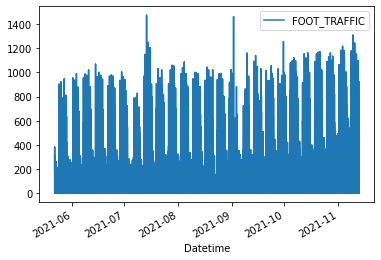

In [ ]:
st = '47-50 STS ROCK'

dfx = df_copy[df_copy['STATION']==st].reset_index(drop=True).iloc[10:,:]

dfx.plot("Datetime", "FOOT_TRAFFIC")
dfx.tail(20)


(-100000000.0, 1000.0)

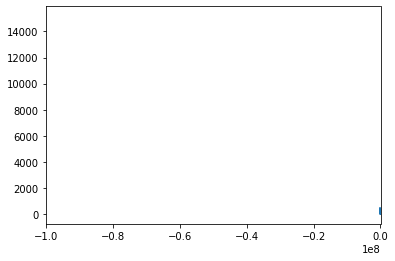

In [ ]:
#df_copy['FOOT_TRAFFIC'].hist(bins = 1000)
#plt.xlim(0,1000)

df_copy['FOOT_TRAFFIC'].plot()
plt.xlim(-100000000,1000)

In [ ]:
#excluding values above 10000
df_copy['FOUR_HOUR_ENTRIES'] = df_copy.groupby(['TURNSTILE']).FOUR_HOUR_ENTRIES.transform(
        lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))

In [ ]:
# clean 'HOURLY_EXITS'
df_copy['FOUR_HOUR_EXITS'] = df_copy.groupby(['TURNSTILE']).FOUR_HOUR_EXITS.transform(
        lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))

In [ ]:
#Summing up traffic by station
station_totals = df_copy.groupby('STATION').sum().sort_values('FOOT_TRAFFIC', ascending=False).head(5)
station_totals.sort_values(by='FOOT_TRAFFIC', ascending=False, inplace=True)
station_totals.reset_index(inplace=True)

In [ ]:
station_totals['FOUR_HOUR_ENTRIES'] = station_totals['FOUR_HOUR_ENTRIES'].astype('int64')
station_totals['FOUR_HOUR_EXITS'] = station_totals['FOUR_HOUR_EXITS'].astype('int64')
station_totals['FOOT_TRAFFIC'] = station_totals['FOOT_TRAFFIC'].astype('int64')


In [ ]:
top_5 = station_totals.head(5)
top_5

,STATION,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
0,34 ST-PENN STA,4911559901238,5437671597941,8018681,10955418,18974100
1,34 ST-HERALD SQ,3190573720533,3955593694659,5962169,8404106,14366276
2,GRD CNTRL-42 ST,2252816876527,1959705781548,5762909,8469982,14232892
3,86 ST,577827204494,813192863129,5476697,7473469,12950167
4,14 ST-UNION SQ,287108026561,206324333516,5213644,7591404,12805049


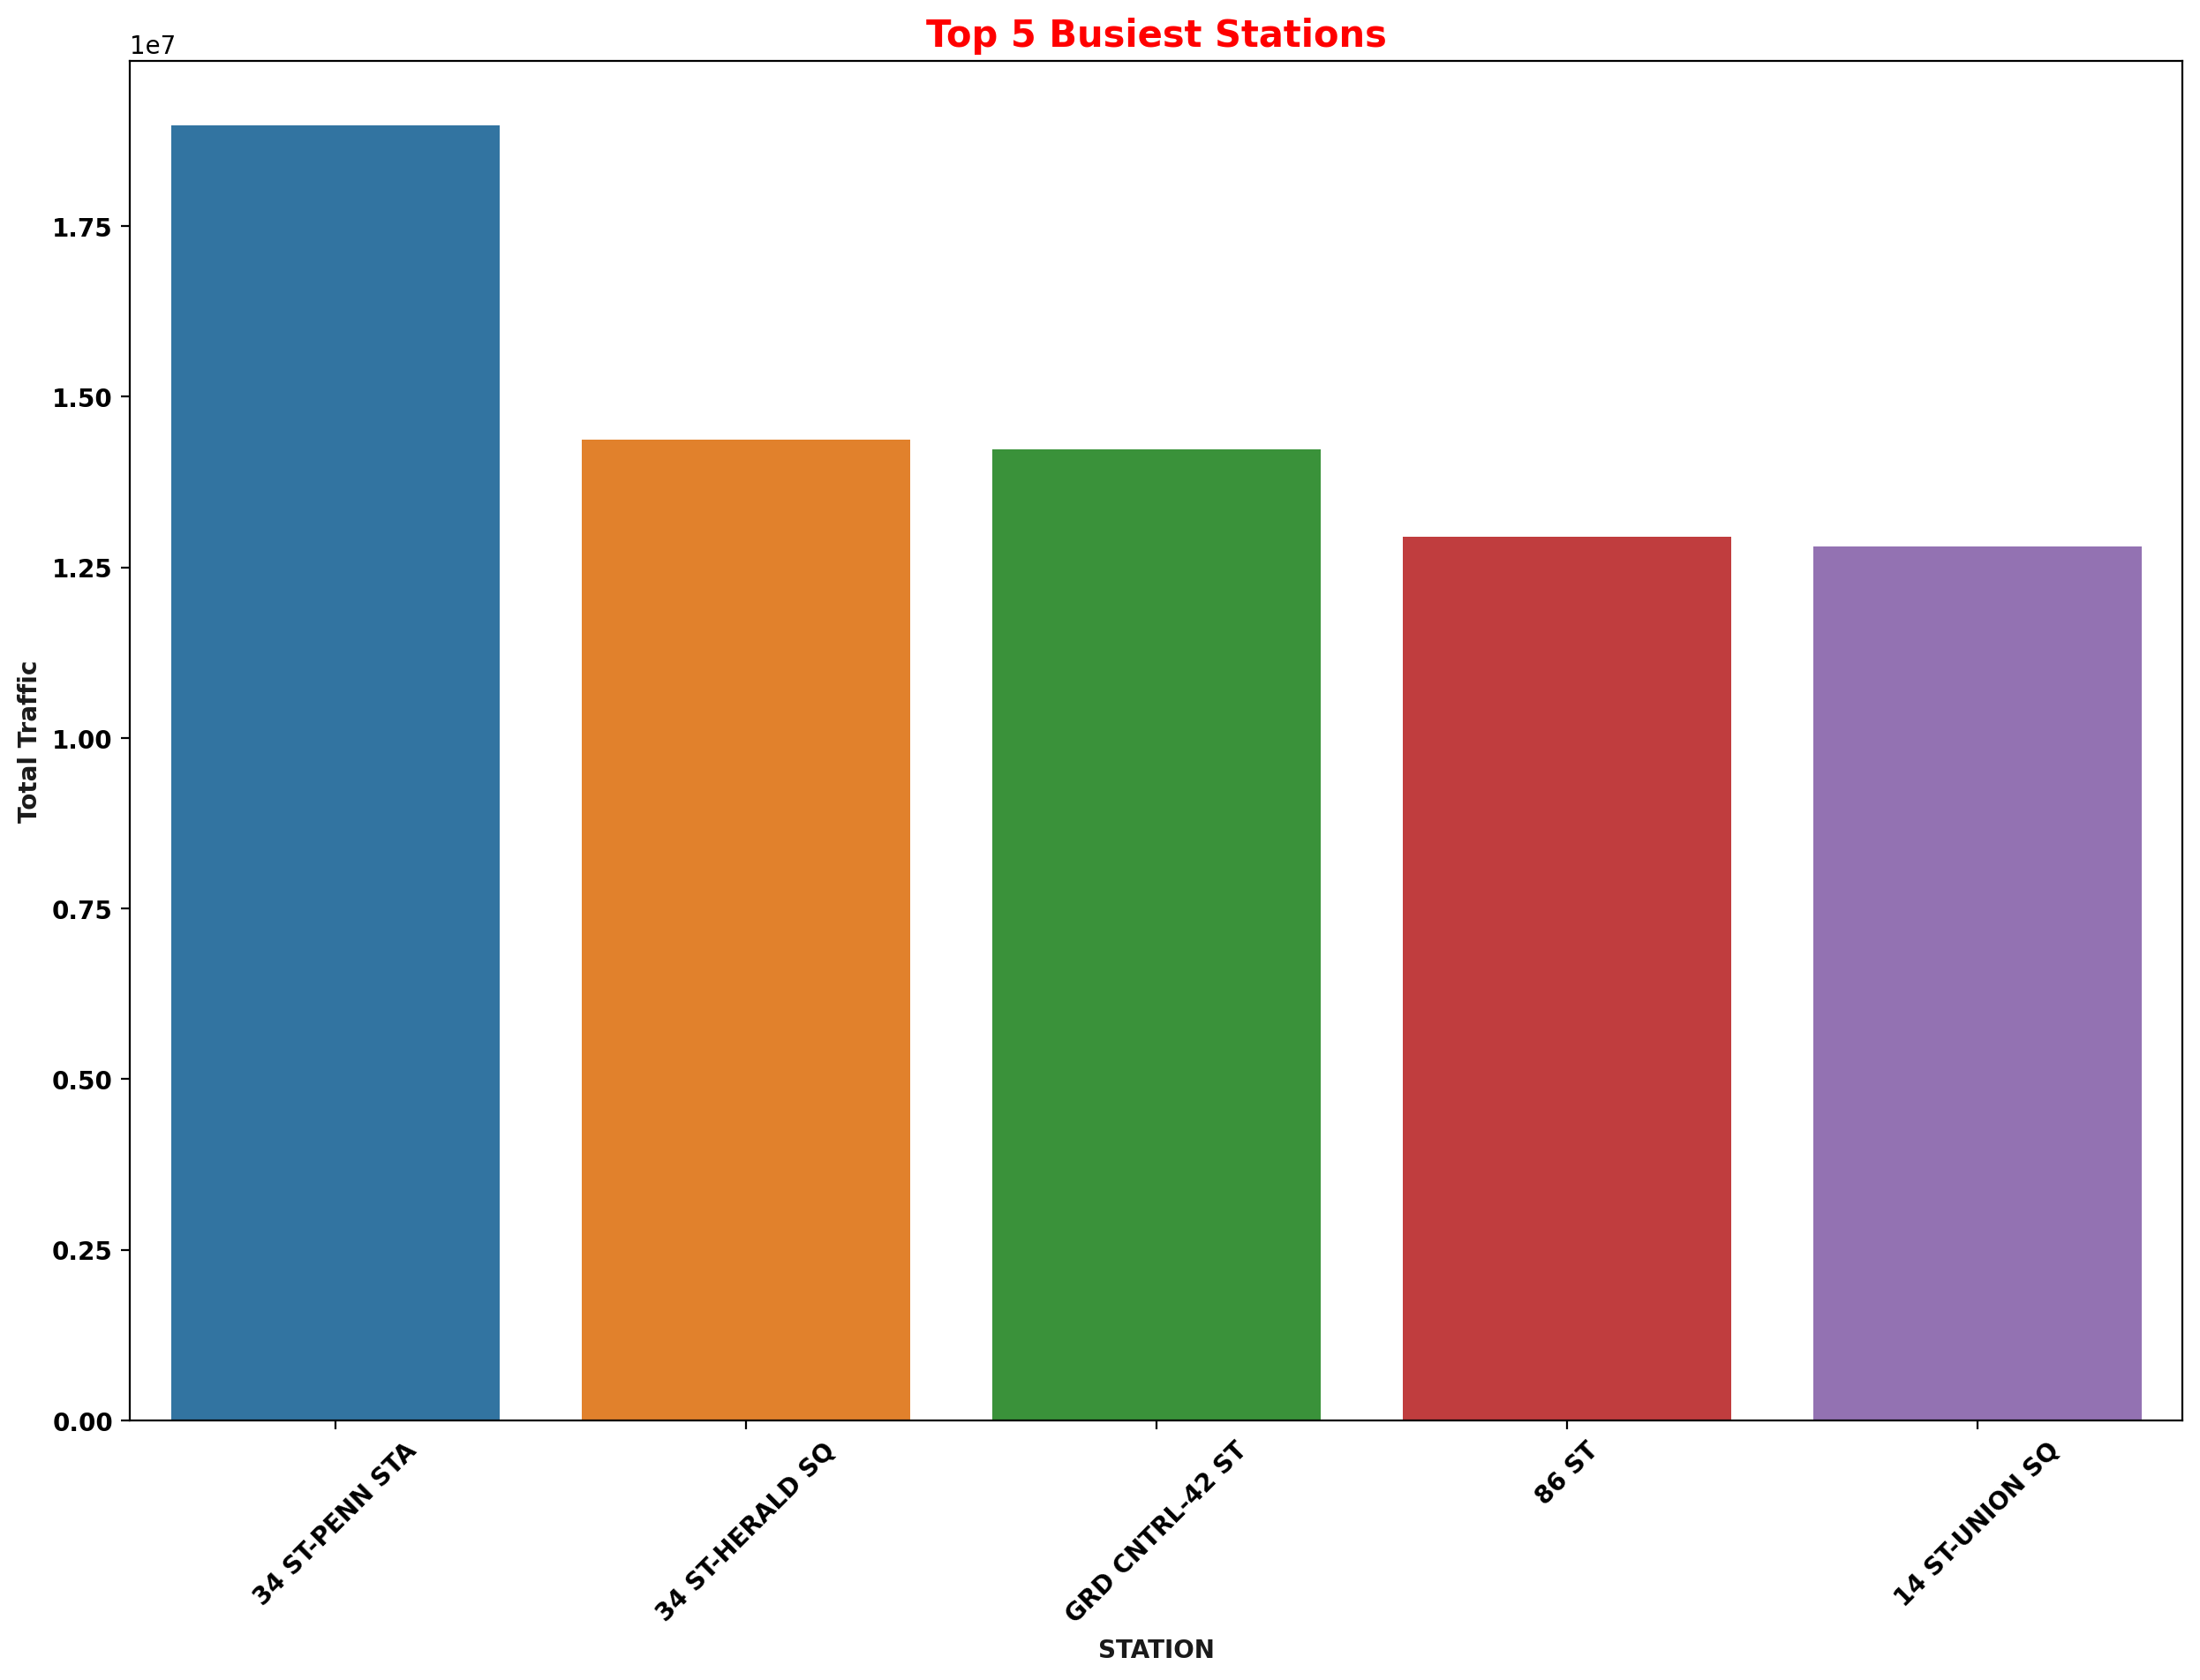

In [ ]:
#Barplot for Top 5 Busiest Stations in last 12 weeks

plt.figure(figsize=(15,10),dpi=200)
plt.style.use('default')
ax = sns.barplot(x="STATION", y="FOOT_TRAFFIC", data=top_5)
plt.title("Top 5 Busiest Stations", weight="bold", c="red", fontsize=15)
plt.xlabel("STATION",weight="bold",c="k")
plt.xticks(rotation=45, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.savefig('output.png', dpi=300)
plt.show()

In [ ]:
top_5_daily = df_copy.groupby(['STATION','NAMEOFDAY']).sum().sort_values('FOOT_TRAFFIC', ascending = False)

In [ ]:
top_5_daily = top_5_daily.reset_index()

In [ ]:
top_5_daily = top_5_daily[(top_5_daily["STATION"]=="34 ST-PENN STA") 
                   | (top_5_daily["STATION"]=='GRD CNTRL-42 ST')
                  | (top_5_daily["STATION"]=="86 ST")
                  | (top_5_daily["STATION"]=="34 ST-HERALD SQ")
                  | (top_5_daily["STATION"]=="14 ST-UNION SQ")]

In [ ]:
top_5_daily = top_5_daily.sort_values(by = ['STATION', 'NAMEOFDAY'], ascending =(True, True))

In [ ]:
top_5_daily.STATION.value_counts()

86 ST              7
GRD CNTRL-42 ST    7
14 ST-UNION SQ     7
34 ST-HERALD SQ    7
34 ST-PENN STA     7
Name: STATION, dtype: int64

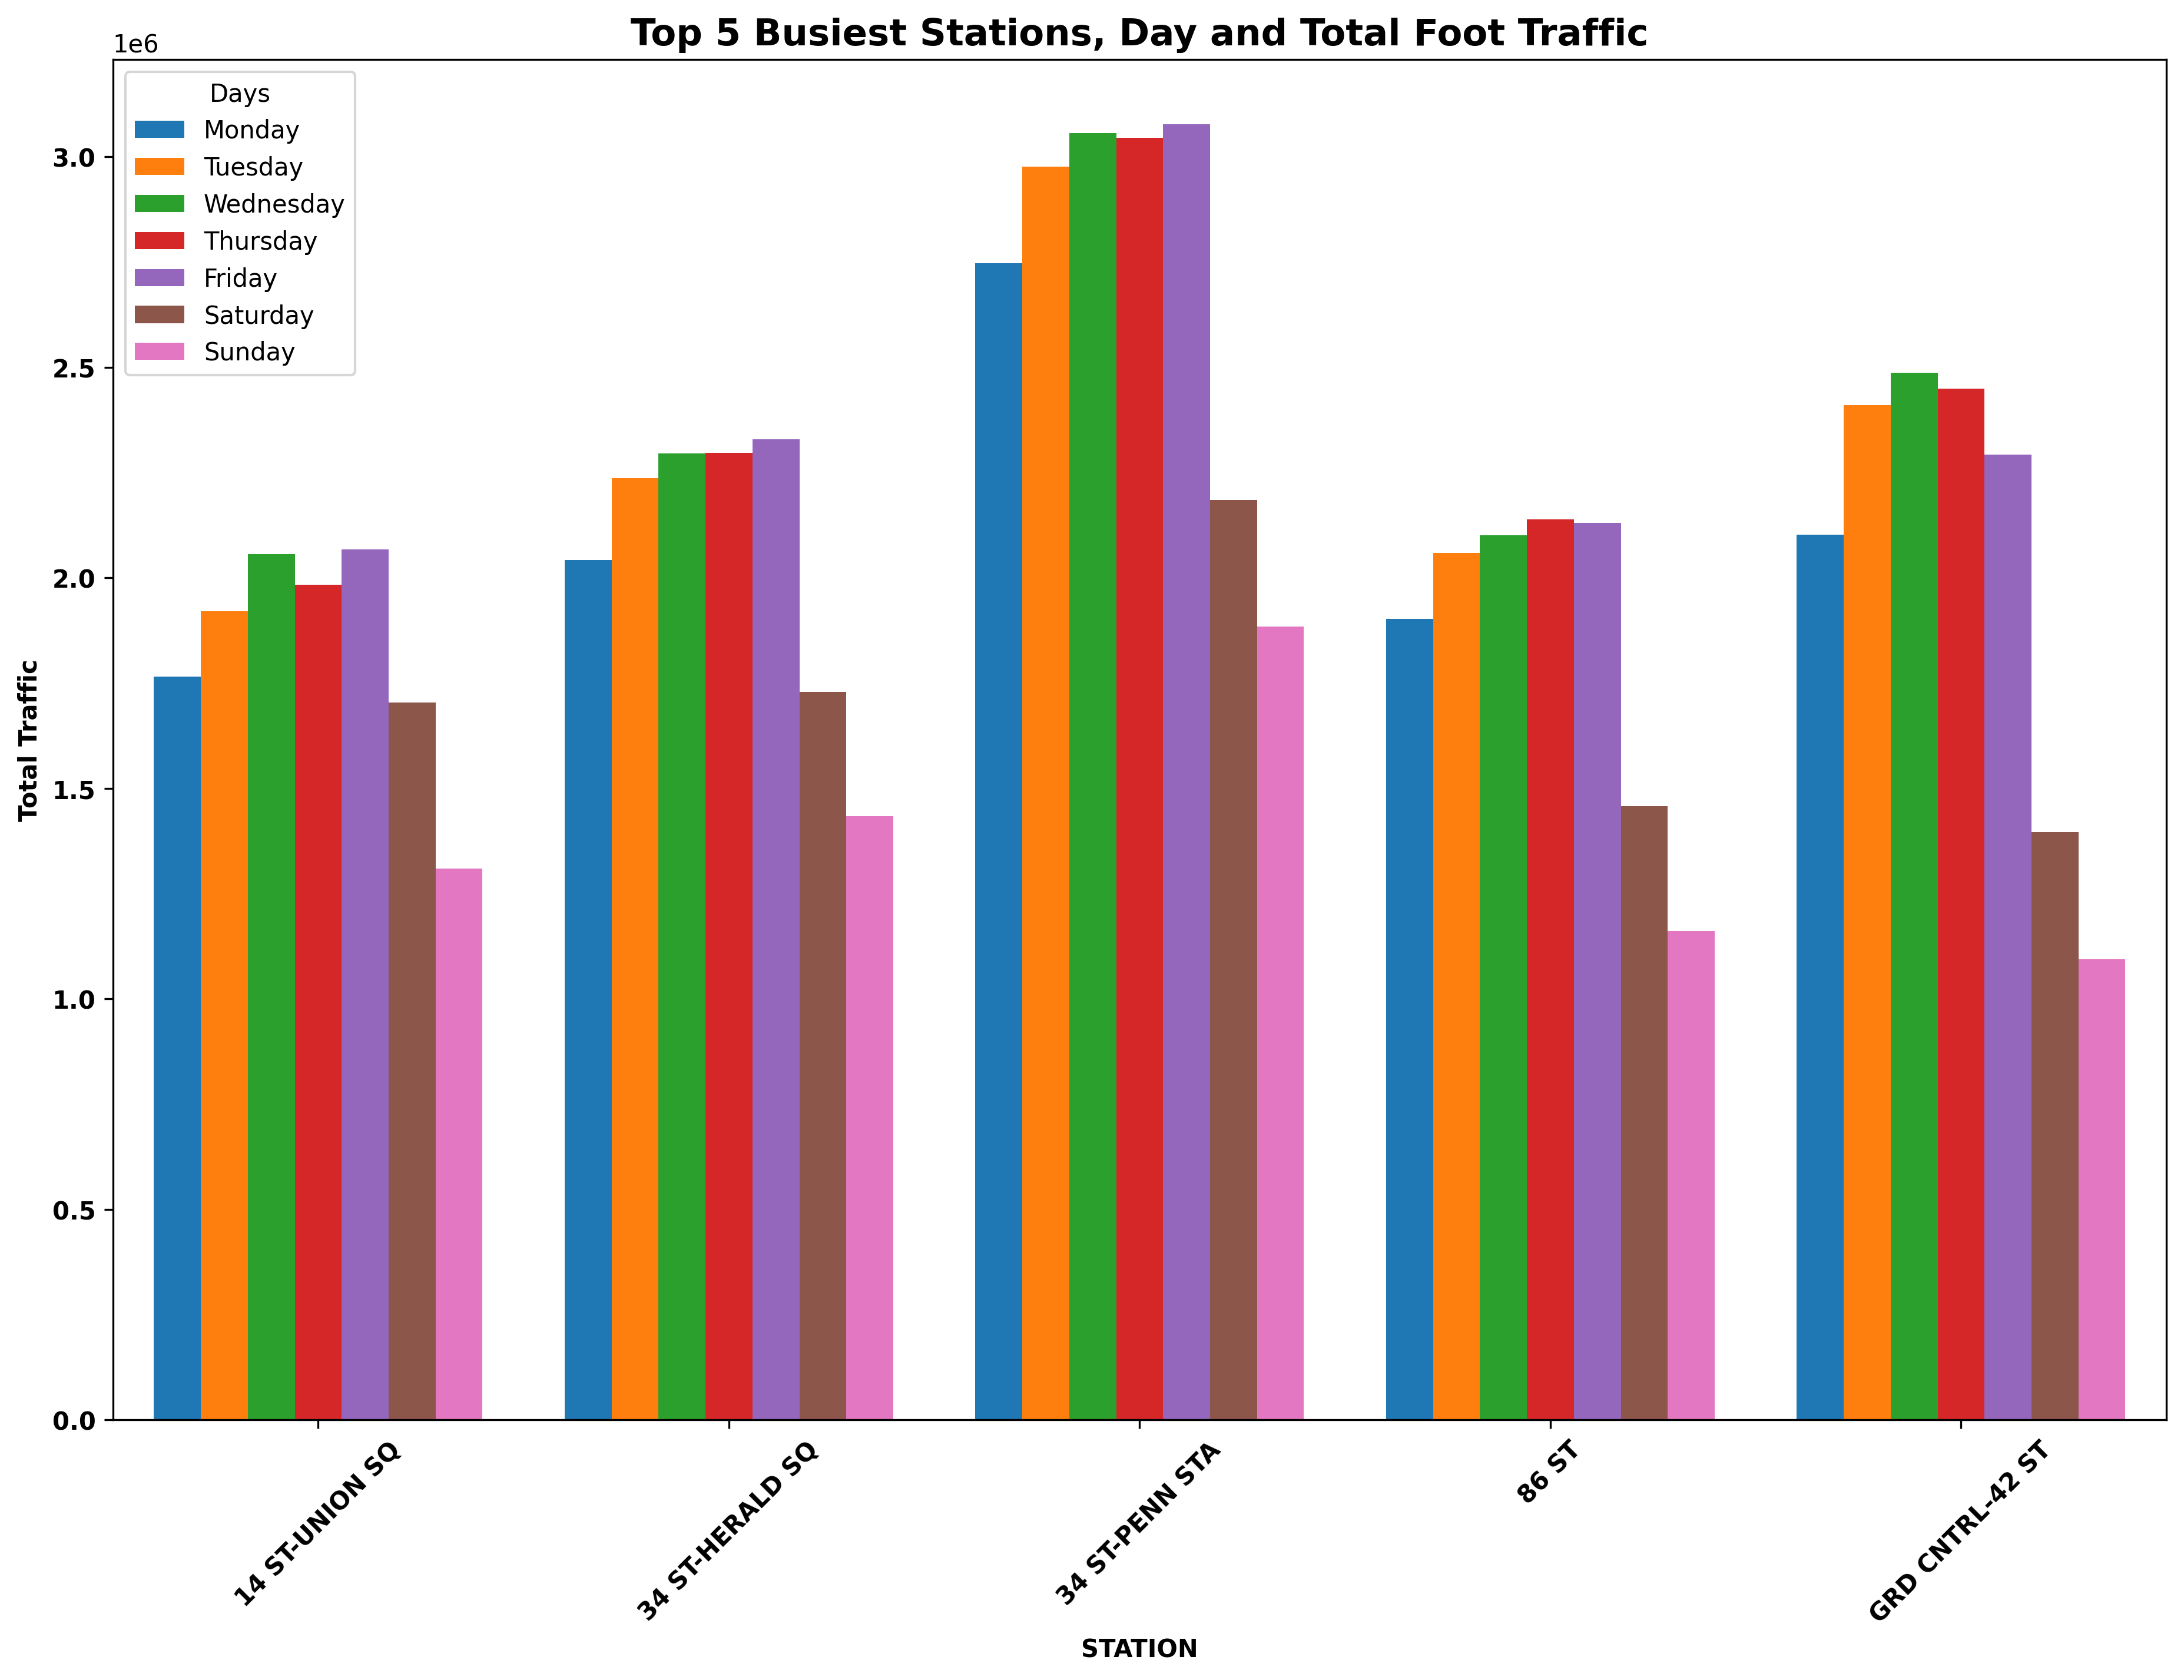

In [ ]:
# Top 5 Busiest Stations per Day
hue_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15,10),dpi=300)
plt.style.use('default')
ax = sns.barplot(x="STATION", y="FOOT_TRAFFIC", hue="NAMEOFDAY",data=top_5_daily, saturation=1,hue_order=hue_order)
plt.title("Top 5 Busiest Stations, Day and Total Foot Traffic", weight="bold", fontsize=15)
plt.xlabel("STATION",weight="bold")
plt.xticks(rotation=45, weight="bold")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.savefig('bar_days.png', dpi=300)
plt.show()

In [ ]:
# Top 5 busiest statios busies hours per week of day
#top5_hourly= df_copy.groupby(['STATION','NAMEOFDAY','TIME'])['FOOT_TRAFFIC'].sum().sort_values(ascending=False)
# top5_hourly.head(20)
# sns.barplot()

In [ ]:
#dt=pd.DataFrame(top5_hourly)
# dt.groupby('NAMEOFDAY')['FOOT_TRAFFIC'].sort_values(ascending=False)
#sns.barplot(stacked=True)
#dt

In [ ]:
# sns.catplot(x="STATION", y="FOOT_TRAFFIC",
#                  hue="NAMEOFDAY", col="NAMEOFDAY",
#                  data=top_5_daily, kind="bar",
#                  height=4, aspect=.7,hue_order=hue_order)
# plt.xticks(rotation=80, weight="bold")


# HeatMap to Display the Days by the Stations

In [ ]:
top_5_daily_heatmap = top_5_daily.groupby(['STATION', 'NAMEOFDAY']).FOOT_TRAFFIC.sum().reset_index()

In [ ]:
top_5_daily_heatmap = top_5_daily_heatmap.pivot('NAMEOFDAY','STATION', 'FOOT_TRAFFIC')

In [ ]:
top_5_daily_heatmap = top_5_daily_heatmap.astype({'14 ST-UNION SQ': 'int', 
                                                  '34 ST-HERALD SQ': 'int', 
                                                  '34 ST-PENN STA': 'int',
                                                 '86 ST' : 'int',
                                                 'GRD CNTRL-42 ST' : 'int'})

In [ ]:
top_5_daily_heatmap = top_5_daily_heatmap.reindex(hue_order).reset_index()

In [ ]:
top_5_daily_heatmap= top_5_daily_heatmap.set_index('NAMEOFDAY')

In [ ]:
top_5_daily_heatmap

STATION,14 ST-UNION SQ,34 ST-HERALD SQ,34 ST-PENN STA,86 ST,GRD CNTRL-42 ST
NAMEOFDAY,,,,,
Monday,1765017,2042685,2747513,1901782,2102929
Tuesday,1921181,2237290,2976889,2059585,2409951
Wednesday,2056452,2295879,3056991,2101649,2487107
Thursday,1983312,2297006,3045536,2138818,2449933
Friday,2066927,2329557,3077212,2129822,2292241
Saturday,1703197,1729420,2185366,1457363,1396596
Sunday,1308962,1434437,1884591,1161145,1094132


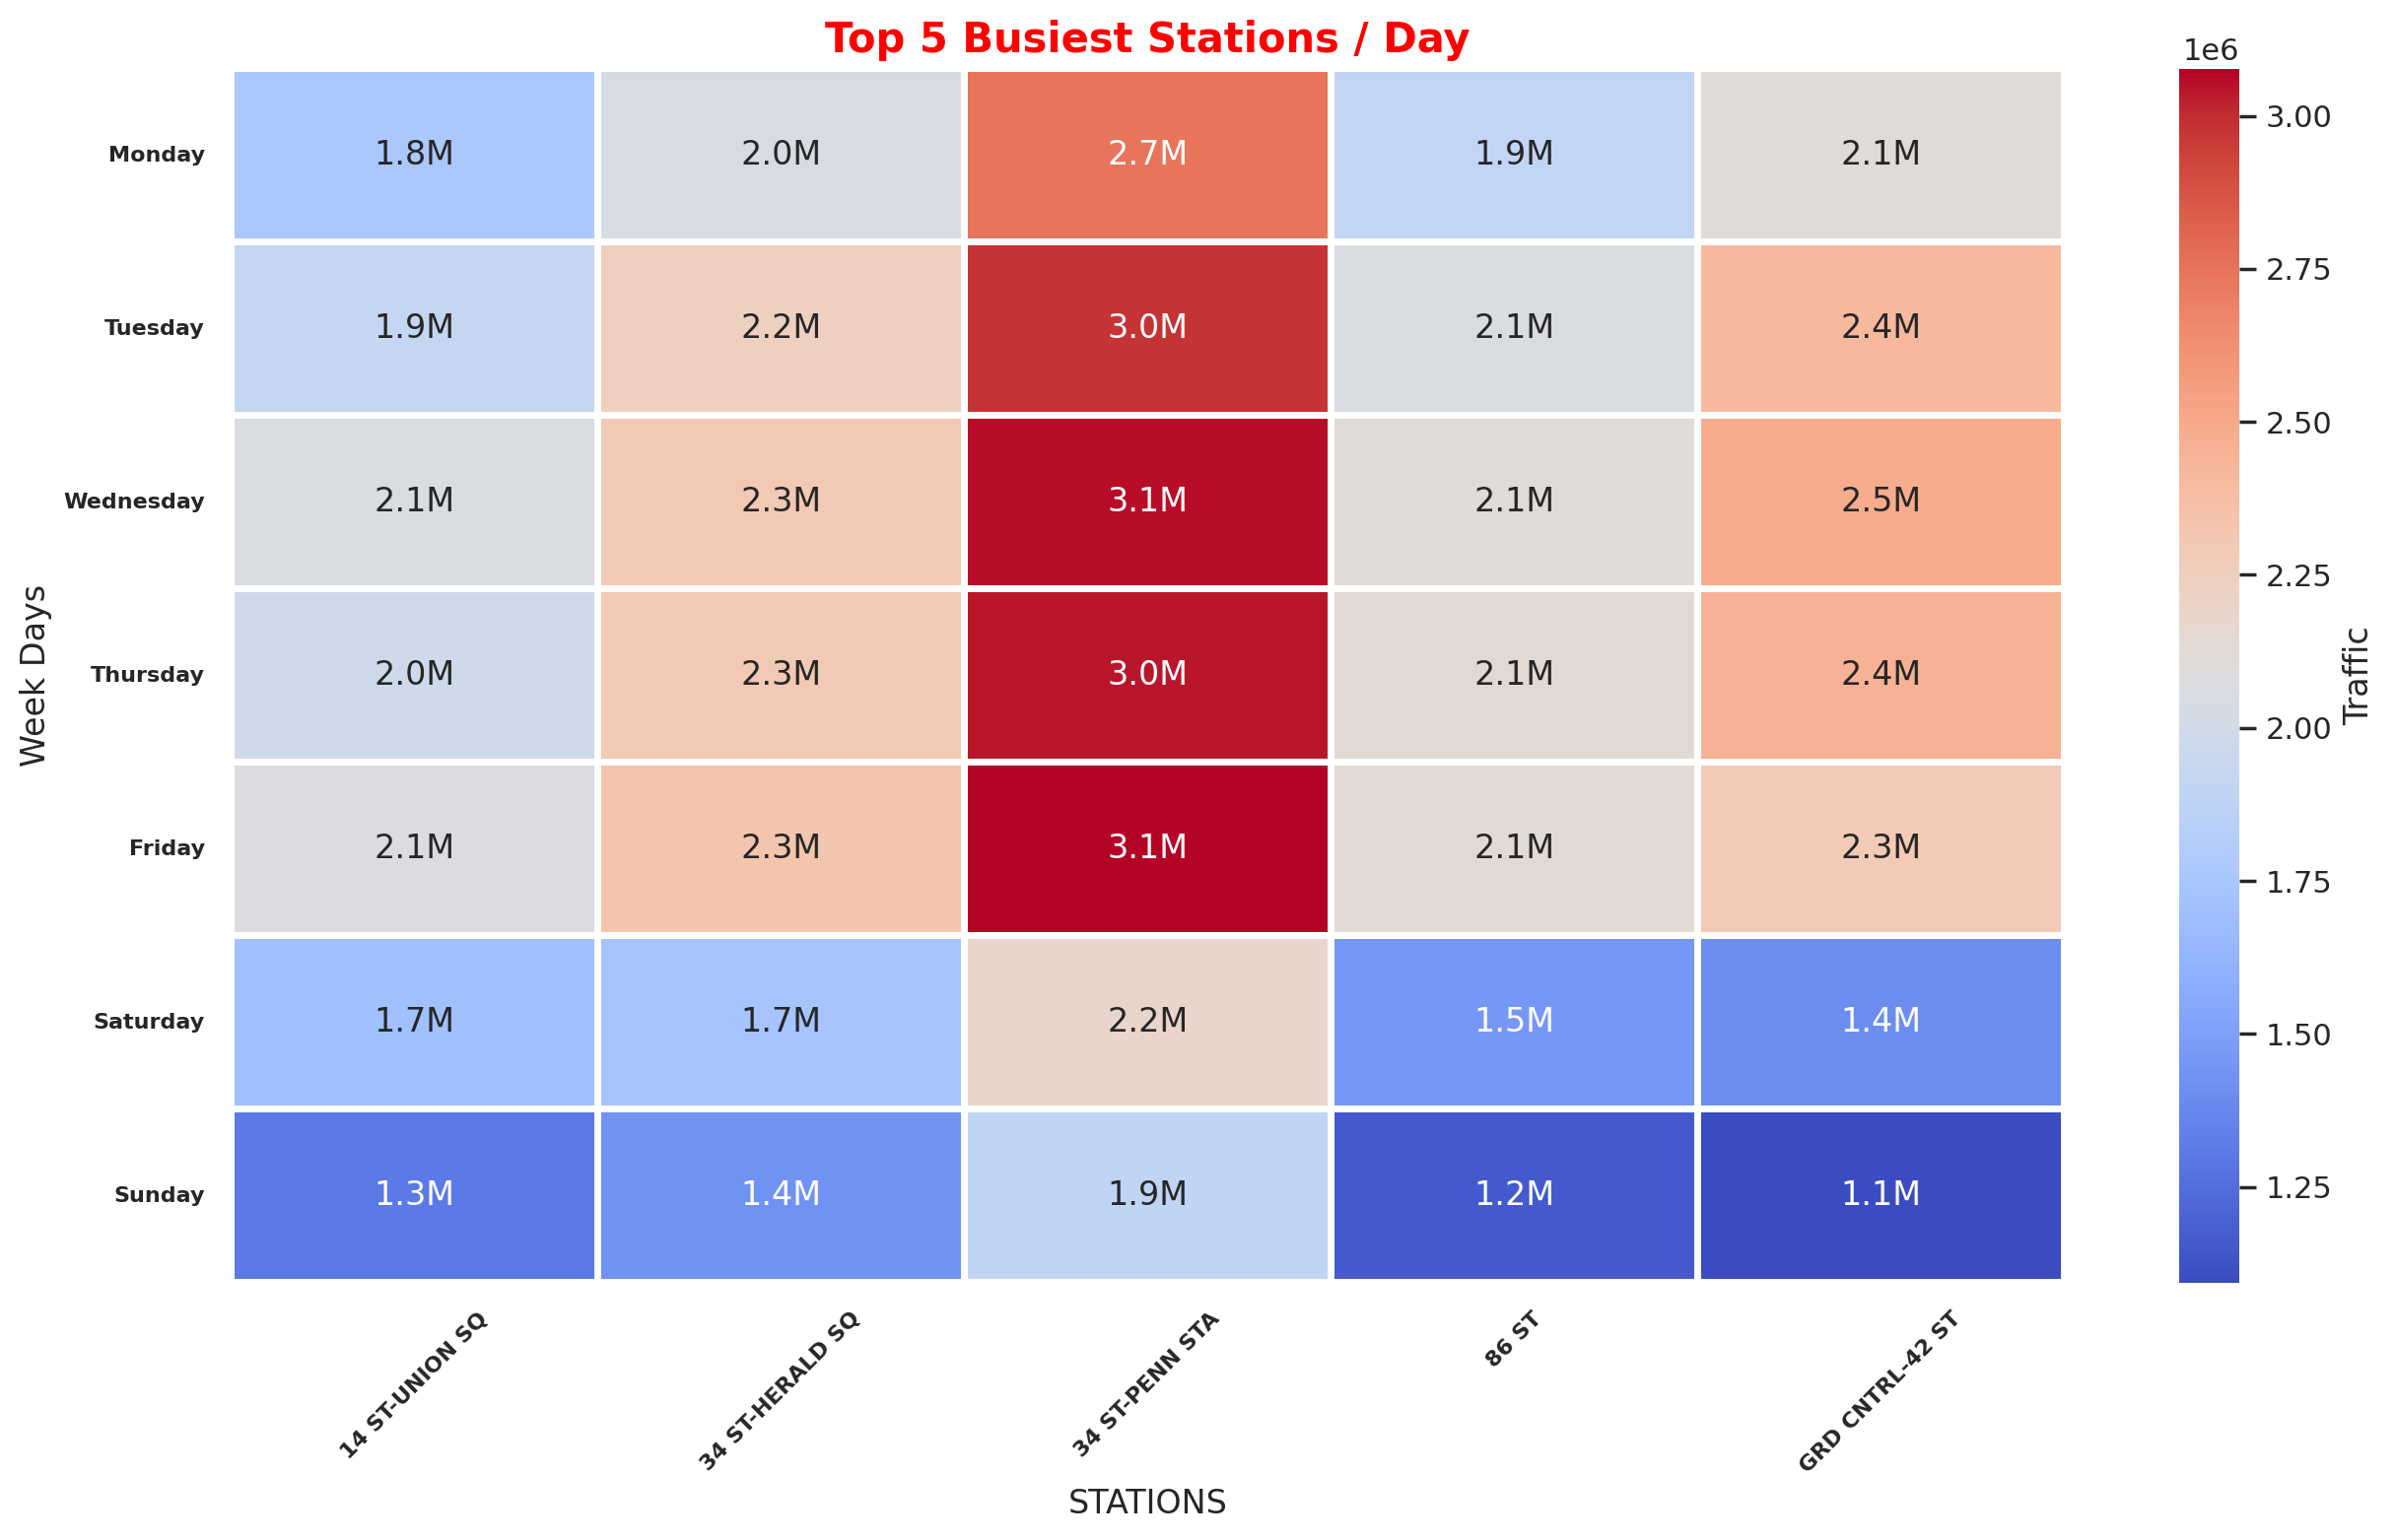

In [ ]:
#Heatmap for per day per station
array = np.array(top_5_daily_heatmap.applymap(lambda x:str(round(x/1000000,1))+'M'))
plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(top_5_daily_heatmap, linewidths=2, cmap="coolwarm",cbar_kws={'label': 'Traffic'}, annot = array, fmt = '')
plt.style.use('default')
plt.ylabel("Week Days")
plt.xlabel("STATIONS")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=45,size=8)
plt.title("Top 5 Busiest Stations / Day",weight="bold",c="red", fontsize=15)
plt.savefig('station_day_heatmap.png', dpi=300)
plt.show()

# Calculating the time in the day


In [ ]:
df_timeline = df_copy.copy()

In [ ]:
df_timeline.head()

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
0,59 ST,A002-R051-02-00-00,05/22/2021,00:00:00,2021-05-22 00:00:00,Saturday,7575503,2588978,0.0,0.0,0.0
1,59 ST,A002-R051-02-00-00,05/22/2021,04:00:00,2021-05-22 04:00:00,Saturday,7575515,2588982,12.0,4.0,16.0
2,59 ST,A002-R051-02-00-00,05/22/2021,08:00:00,2021-05-22 08:00:00,Saturday,7575523,2588989,8.0,7.0,15.0
3,59 ST,A002-R051-02-00-00,05/22/2021,12:00:00,2021-05-22 12:00:00,Saturday,7575557,2588996,34.0,7.0,41.0
4,59 ST,A002-R051-02-00-00,05/22/2021,16:00:00,2021-05-22 16:00:00,Saturday,7575630,2589008,73.0,12.0,85.0


In [ ]:
df_timeline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242282 entries, 0 to 5242281
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   STATION            object        
 1   TURNSTILE          object        
 2   DATE               object        
 3   TIME               object        
 4   Datetime           datetime64[ns]
 5   NAMEOFDAY          object        
 6   ENTRIES            int64         
 7   EXITS              int64         
 8   FOUR_HOUR_ENTRIES  float64       
 9   FOUR_HOUR_EXITS    float64       
 10  FOOT_TRAFFIC       float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 479.9+ MB


In [ ]:
df_timeline_5 = df_timeline[(df_timeline["STATION"]=="34 ST-PENN STA") 
                   | (df_timeline["STATION"]=='GRD CNTRL-42 ST')
                  | (df_timeline["STATION"]=="86 ST")
                  | (df_timeline["STATION"]=="34 ST-HERALD SQ")
                  | (df_timeline["STATION"]=="14 ST-UNION SQ")]

In [ ]:
df_timeline['FOUR_HOUR_ENTRIES'] = df_timeline.groupby(['TURNSTILE']).FOUR_HOUR_ENTRIES.transform(lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))
df_timeline['FOUR_HOUR_EXITS'] = df_timeline.groupby(['TURNSTILE']).FOUR_HOUR_EXITS.transform(lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))

In [ ]:
df_timeline_5 = df_timeline_5.groupby(['STATION','NAMEOFDAY','TIME'])['FOOT_TRAFFIC'].sum()

In [ ]:
df_timeline_5

STATION          NAMEOFDAY  TIME    
14 ST-UNION SQ   Friday     00:00:00     10427.0
                            01:00:00    165084.0
                            04:00:00      1522.0
                            05:00:00     18480.0
                            08:00:00      7733.0
                                          ...   
GRD CNTRL-42 ST  Wednesday  17:00:00    270451.0
                            19:00:00     21391.0
                            20:00:00    396023.0
                            21:00:00    262975.0
                            23:00:00      7095.0
Name: FOOT_TRAFFIC, Length: 678, dtype: float64

In [ ]:
df_5=pd.DataFrame(df_timeline_5)

In [ ]:
df_5 =df_5.reset_index()

In [ ]:
df_34 = df_5[df_5['STATION'] =='34 ST-PENN STA']

In [ ]:
df_34

,STATION,NAMEOFDAY,TIME,FOOT_TRAFFIC
174,34 ST-PENN STA,Friday,00:00:00,201719.0
175,34 ST-PENN STA,Friday,01:00:00,3150.0
176,34 ST-PENN STA,Friday,02:00:00,42950.0
177,34 ST-PENN STA,Friday,03:00:00,3009.0
178,34 ST-PENN STA,Friday,04:00:00,41743.0
...,...,...,...,...
382,34 ST-PENN STA,Wednesday,19:00:00,38698.0
383,34 ST-PENN STA,Wednesday,20:00:00,662810.0
384,34 ST-PENN STA,Wednesday,21:00:00,11498.0
385,34 ST-PENN STA,Wednesday,22:00:00,144941.0


In [ ]:
df_35 = df_34.groupby(["NAMEOFDAY","TIME"])

In [ ]:
df_35 = df_35["FOOT_TRAFFIC"].mean().reset_index()

In [ ]:
#Creating Pivot table for heatmap

df_35 = df_35.pivot(index="TIME", columns="NAMEOFDAY",values="FOOT_TRAFFIC")
df_35 = df_35[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

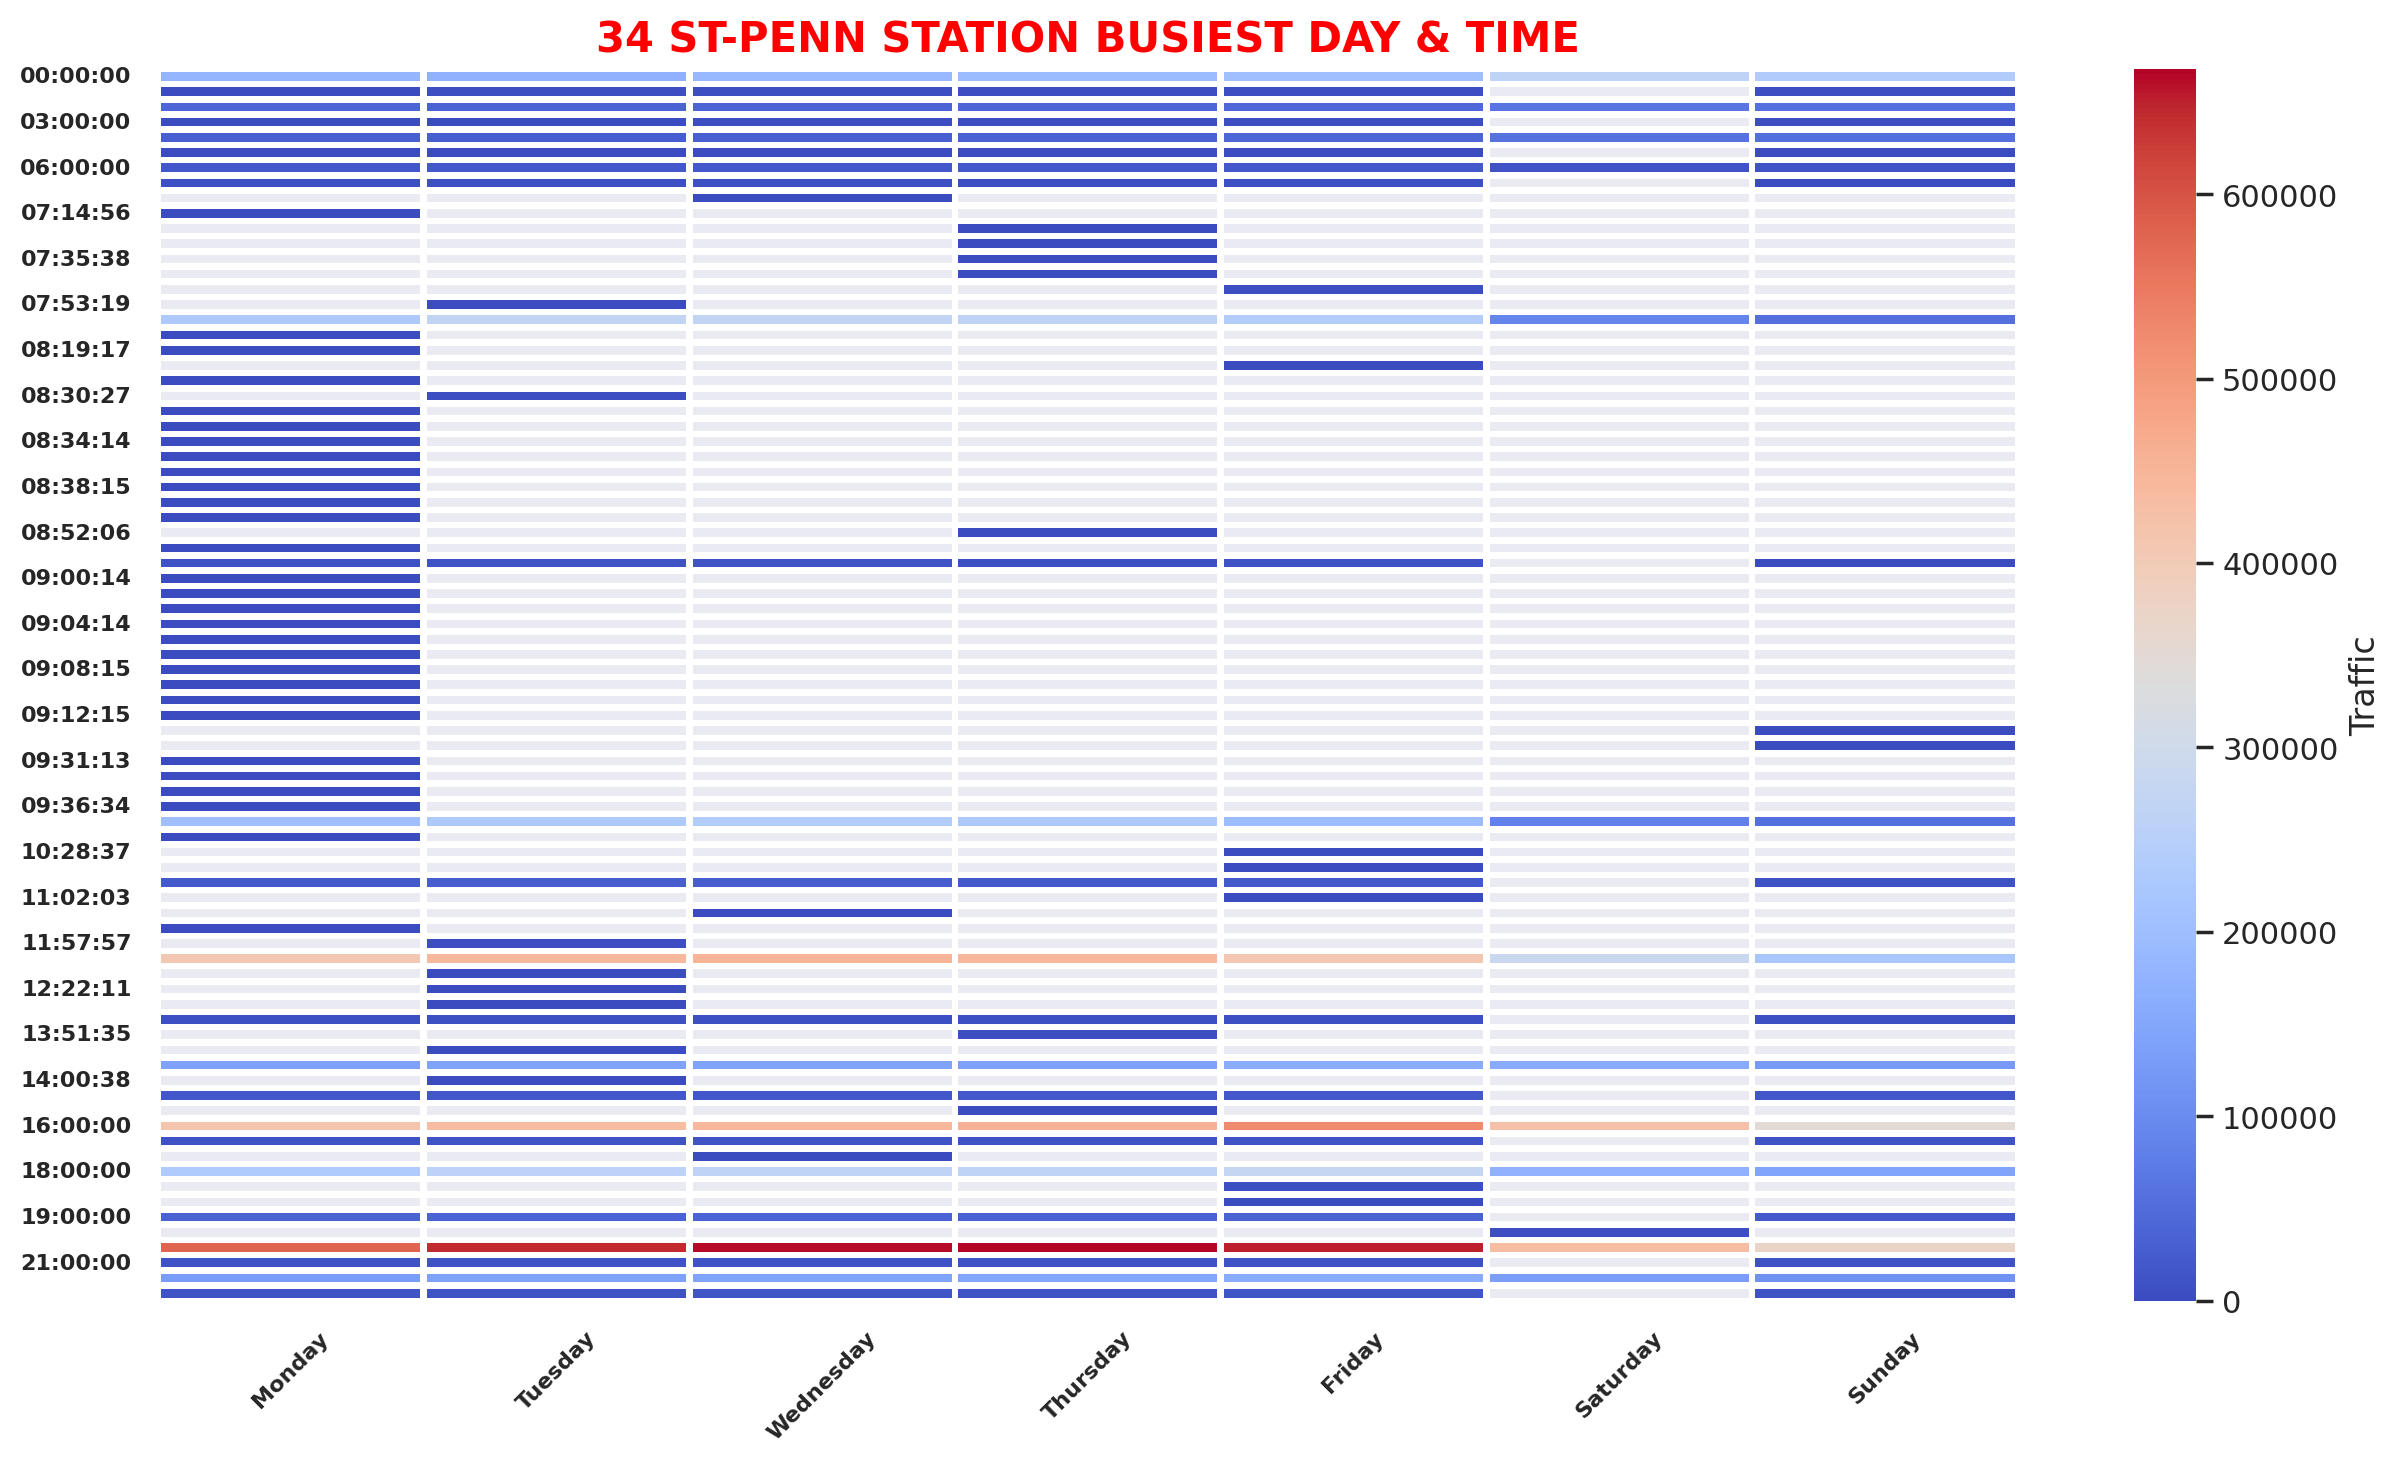

In [ ]:
plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(df_35, linewidths=2, cmap="coolwarm",cbar_kws={'label': 'Traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=45,size=8)
plt.title("34 ST-PENN STATION BUSIEST DAY & TIME",weight="bold",c="red", fontsize=15)
plt.savefig('34st_data_discre.png', dpi=300)
plt.show()